In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [42]:
df = pd.read_csv('/Users/joshuagrossman/Desktop/DS-SF-23 Final Project/Kobe/kobe_data_1.csv') 

In [43]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,...,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [44]:
df.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
                       ...   
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [45]:
df.shape

(30697, 25)

In [46]:
df.count()

action_type           30697
combined_shot_type    30697
game_event_id         30697
game_id               30697
lat                   30697
                      ...  
team_name             30697
game_date             30697
matchup               30697
opponent              30697
shot_id               30697
dtype: int64

In [47]:
df.set_index('shot_id', inplace=True)
df["action_type"] = df["action_type"].astype('object')
df["combined_shot_type"] = df["combined_shot_type"].astype('category')
df["game_event_id"] = df["game_event_id"].astype('category')
df["game_id"] = df["game_id"].astype('category')
df["period"] = df["period"].astype('object')
df["playoffs"] = df["playoffs"].astype('category')
df["season"] = df["season"].astype('category')
#df["shot_made_flag"] = df["shot_made_flag"].astype('category')
df["shot_type"] = df["shot_type"].astype('category')
df["team_id"] = df["team_id"].astype('category')

In [48]:
#Average shot distance is 13.4 and the standard deviation is 9.3
df.describe()

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance,shot_made_flag
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000
mean,33.953192,7.110499,91.107535,-118.262690,4.885624,28.365085,13.437437,0.446161
std,0.087791,110.124578,87.791361,0.110125,3.449897,17.478949,9.374189,0.497103
min,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000,0.000000
25%,33.884300,-68.000000,4.000000,-118.337800,2.000000,13.000000,5.000000,0.000000
50%,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000,0.000000
75%,34.040300,95.000000,160.000000,-118.174800,8.000000,43.000000,21.000000,1.000000
max,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000,1.000000


In [49]:
#Kobe always played for the LA Lakers, so team_name never changes
#Same with team_id
#game_event_id not useful either

df.describe(include=['object', 'category'])

,action_type,combined_shot_type,game_event_id,game_id,period,...,team_id,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,...,30697,30697,30697,30697,30697
unique,57,6,620,1559,7,...,1,1,1559,74,33
top,Jump Shot,Jump Shot,2,21501228,3,...,1610612747,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,132,50,8296,...,30697,30697,50,1020,1978


In [16]:
#loc_X & lon are highly correlated - don't need both variables
#loc_y & lat are highly correlated - don't need both variables
df.corr()

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance
lat,1.000000,0.016217,-1.000000,0.016217,0.071462,0.052714,-0.818517
loc_x,0.016217,1.000000,-0.016217,1.000000,0.006898,0.001083,0.022654
loc_y,-1.000000,-0.016217,1.000000,-0.016217,-0.071462,-0.052714,0.818517
lon,0.016217,1.000000,-0.016217,1.000000,0.006898,0.001083,0.022654
minutes_remaining,0.071462,0.006898,-0.071462,0.006898,1.000000,0.025558,-0.059767
seconds_remaining,0.052714,0.001083,-0.052714,0.001083,0.025558,1.000000,-0.051482
shot_distance,-0.818517,0.022654,0.818517,0.022654,-0.059767,-0.051482,1.000000


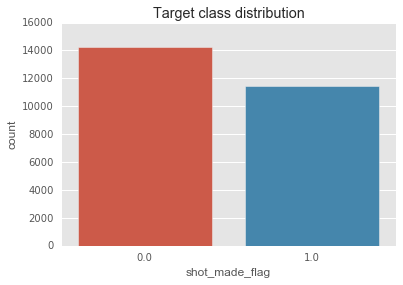

In [21]:
ax = plt.axes()
sns.countplot(x='shot_made_flag', data=df, ax=ax);
ax.set_title('Target class distribution')
plt.show()

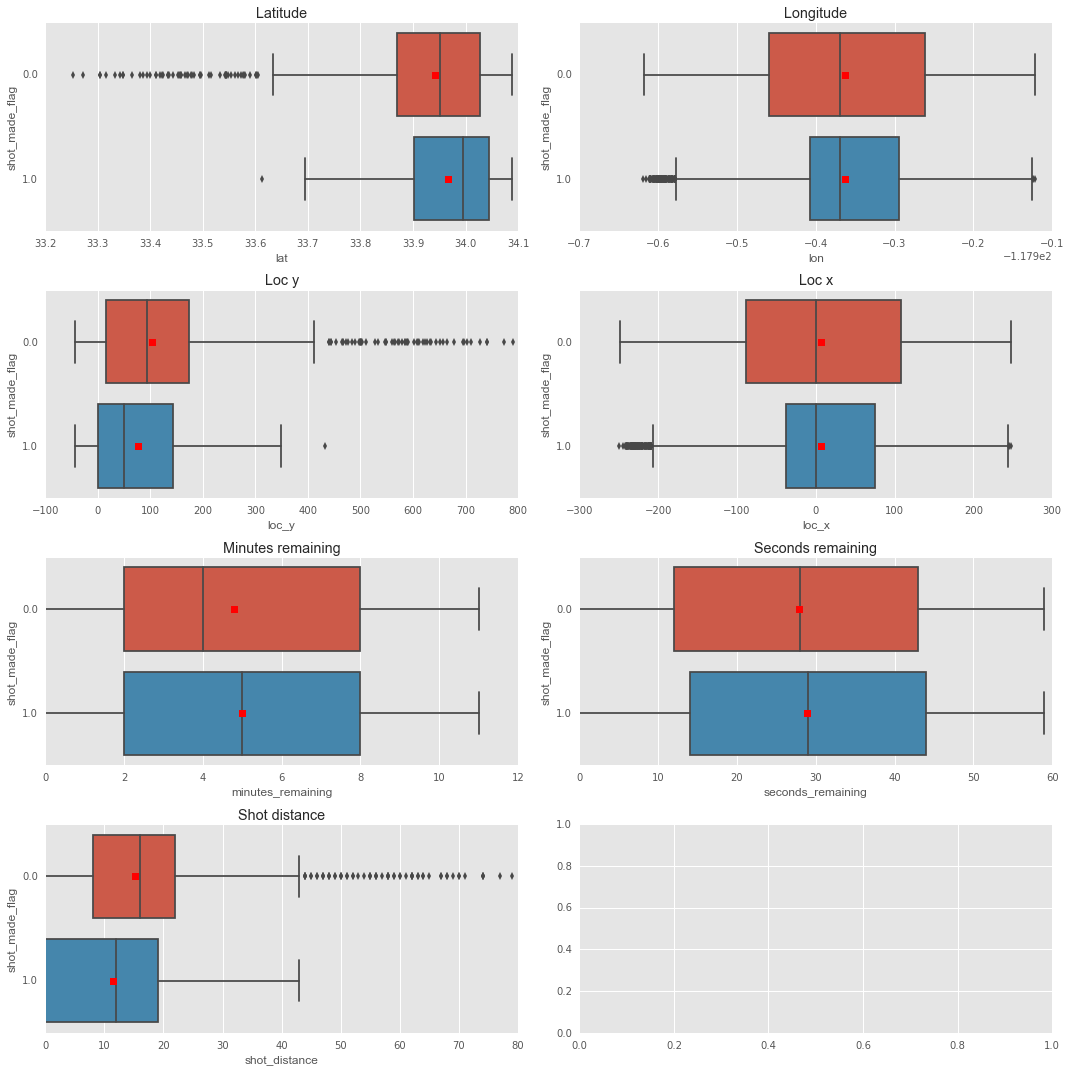

In [23]:
f, axarr = plt.subplots(4, 2, figsize=(15, 15))

sns.boxplot(x='lat', y='shot_made_flag', data=df, showmeans=True, ax=axarr[0,0])
sns.boxplot(x='lon', y='shot_made_flag', data=df, showmeans=True, ax=axarr[0, 1])
sns.boxplot(x='loc_y', y='shot_made_flag', data=df, showmeans=True, ax=axarr[1, 0])
sns.boxplot(x='loc_x', y='shot_made_flag', data=df, showmeans=True, ax=axarr[1, 1])
sns.boxplot(x='minutes_remaining', y='shot_made_flag', showmeans=True, data=df, ax=axarr[2, 0])
sns.boxplot(x='seconds_remaining', y='shot_made_flag', showmeans=True, data=df, ax=axarr[2, 1])
sns.boxplot(x='shot_distance', y='shot_made_flag', data=df, showmeans=True, ax=axarr[3, 0])

axarr[0, 0].set_title('Latitude')
axarr[0, 1].set_title('Longitude')
axarr[1, 0].set_title('Loc y')
axarr[1, 1].set_title('Loc x')
axarr[2, 0].set_title('Minutes remaining')
axarr[2, 1].set_title('Seconds remaining')
axarr[3, 0].set_title('Shot distance')

plt.tight_layout()
plt.show()
#Notes:
#Lat - missed shots very far from the hoop have the most outliers
#Lon - Kobe favored the right side

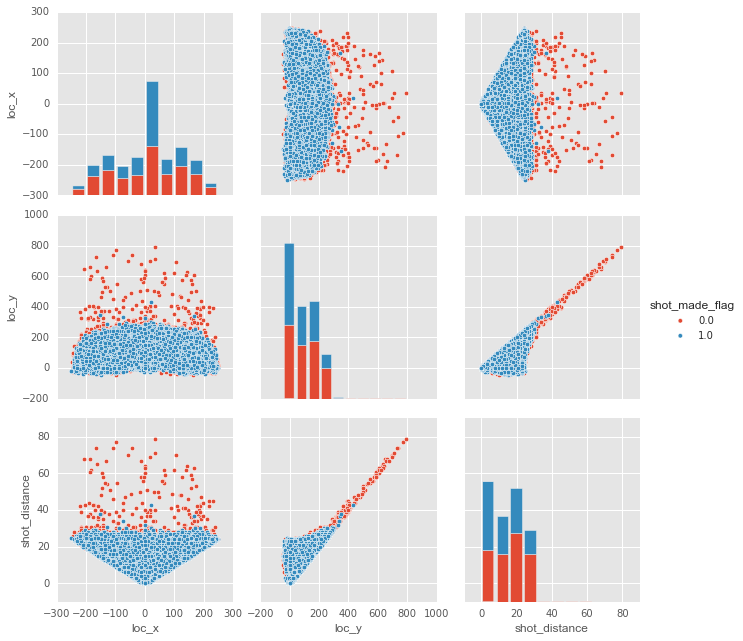

In [37]:
#From left to right:
#Loc_x - the vast majority of the attempted shots were taken from the middle of the floor (in front of the basket)
#Loc_y - the vast majority of the attempted shots were taken from below the three point line

sns.pairplot(df, vars=['loc_x', 'loc_y', 'shot_distance'], hue='shot_made_flag', size=3)
plt.show()

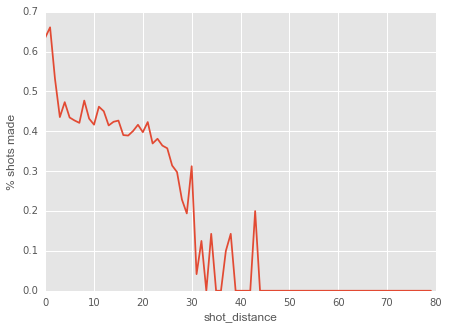

In [52]:
#Distance vs Accuracy
# Shooting accuracy with shot distance
def get_acc(df, against):
    ct = pd.crosstab(df.shot_made_flag, df[against]).apply(lambda x:x/x.sum(), axis=0)
    x, y = ct.columns, ct.values[1, :]
    plt.figure(figsize=(7, 5))
    plt.plot(x, y)
    plt.xlabel(against)
    plt.ylabel('% shots made')
    plt.savefig(against + '_vs_accuracy.png')
get_acc(df, 'shot_distance')

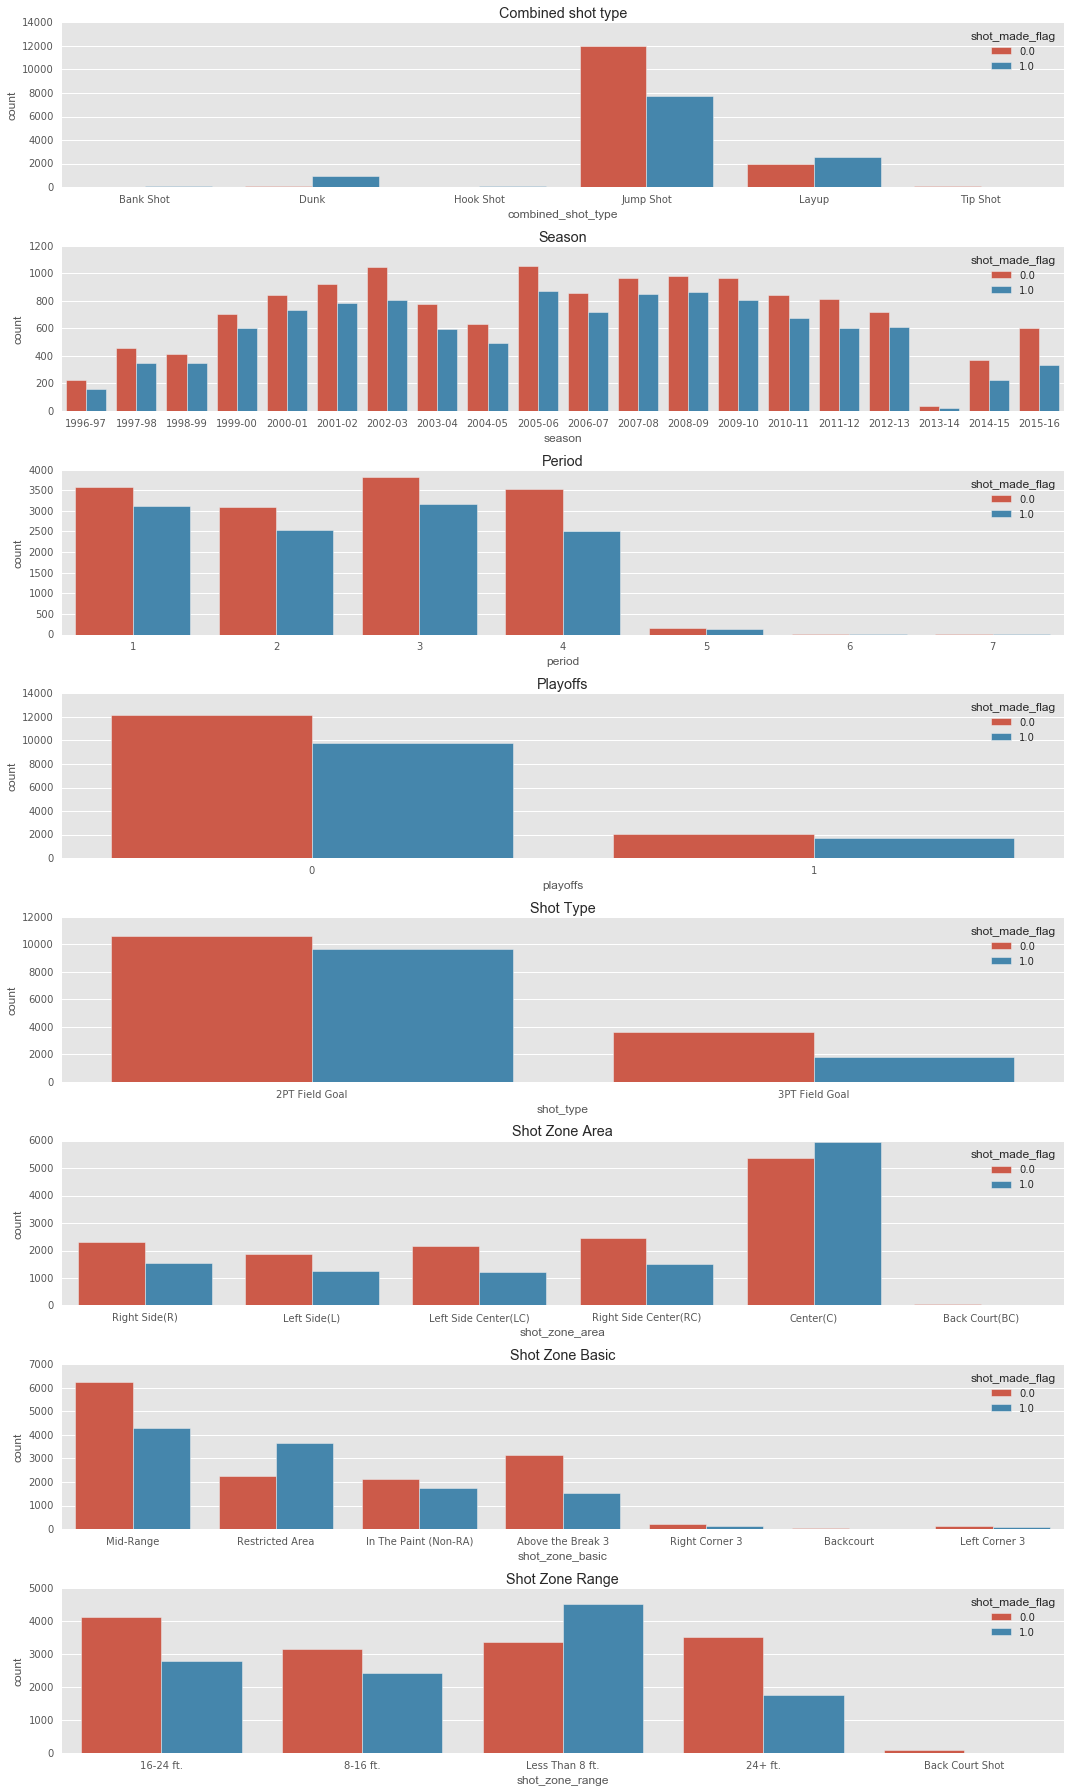

In [26]:
f, axarr = plt.subplots(8, figsize=(15, 25))

sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=df, ax=axarr[0])
sns.countplot(x="season", hue="shot_made_flag", data=df, ax=axarr[1])
sns.countplot(x="period", hue="shot_made_flag", data=df, ax=axarr[2])
sns.countplot(x="playoffs", hue="shot_made_flag", data=df, ax=axarr[3])
sns.countplot(x="shot_type", hue="shot_made_flag", data=df, ax=axarr[4])
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=df, ax=axarr[5])
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=df, ax=axarr[6])
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=df, ax=axarr[7])

axarr[0].set_title('Combined shot type')
axarr[1].set_title('Season')
axarr[2].set_title('Period')
axarr[3].set_title('Playoffs')
axarr[4].set_title('Shot Type')
axarr[5].set_title('Shot Zone Area')
axarr[6].set_title('Shot Zone Basic')
axarr[7].set_title('Shot Zone Range')

plt.tight_layout()
plt.show()

In [9]:
#Avergae shot %
df['shot_made_flag'].mean()

0.44616103047048294

In [10]:
df.action_type.unique()

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot', 'Running Jump Shot',
       'Driving Layup Shot', 'Reverse Layup Shot', 'Reverse Dunk Shot',
       'Slam Dunk Shot', 'Turnaround Jump Shot', 'Tip Shot',
       'Running Hook Shot', 'Alley Oop Dunk Shot', 'Dunk Shot',
       'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Running Tip Shot',
       'Jump Hook Shot', 'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Reverse Layup Shot',
       'Driving Finger Roll Layup Shot', 'Fadeaway Bank shot',
       'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Reverse Slam Dunk Shot', 'Turnaround Bank shot',
   

In [11]:
df.combined_shot_type.unique()

array(['Jump Shot', 'Dunk', 'Layup', 'Tip Shot', 'Hook Shot', 'Bank Shot'], dtype=object)

In [12]:
df.shot_type.unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [13]:
df.shot_zone_area.unique()

array(['Right Side(R)', 'Left Side(L)', 'Left Side Center(LC)',
       'Right Side Center(RC)', 'Center(C)', 'Back Court(BC)'], dtype=object)

In [14]:
df.shot_zone_range.unique()

array(['16-24 ft.', '8-16 ft.', 'Less Than 8 ft.', '24+ ft.',
       'Back Court Shot'], dtype=object)

In [15]:
df.shot_zone_basic.unique()

array(['Mid-Range', 'Restricted Area', 'In The Paint (Non-RA)',
       'Above the Break 3', 'Right Corner 3', 'Backcourt', 'Left Corner 3'], dtype=object)